In [14]:
# Cross-country comparison: boxplots + summary table
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#  1 Paths to cleaned CSVs (adjust names if needed) 

In [15]:
candidates = {
    "Benin": ["data/benin_clean.csv", "../data/benin_clean.csv", "data/benin-malanville_clean.csv"],
    "SierraLeone": ["data/sierra_leone_clean.csv", "../data/sierraleone_clean.csv", "data/sierra-leone_clean.csv"],
    "Togo": ["data/togo_clean.csv", "../data/togo_clean.csv", "data/togo_clean.csv"]
}

# Try to load each file, choose first existing path
loaded = {}
for country, paths in candidates.items():
    found = False
    for p in paths:
        if os.path.exists(p):
            df = pd.read_csv(p, parse_dates=True, index_col=0)
            df.index.name = df.index.name or "Timestamp"
            loaded[country] = df
            print(f"Loaded {country} from: {p}  (shape={df.shape})")
            found = True
            break
    if not found:
        print(f"WARNING: cleaned CSV for {country} not found at any of: {paths}")

# If none loaded, stop
if len(loaded) == 0:
    raise SystemExit("No cleaned CSVs found. Place them under data/ and re-run.")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12952\2283669421.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(p, parse_dates=True, index_col=0)


Loaded Benin from: ../data/benin_clean.csv  (shape=(525600, 17))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12952\2283669421.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(p, parse_dates=True, index_col=0)


Loaded SierraLeone from: ../data/sierraleone_clean.csv  (shape=(525600, 17))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12952\2283669421.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(p, parse_dates=True, index_col=0)


Loaded Togo from: ../data/togo_clean.csv  (shape=(525600, 17))


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------
# 1. Load cleaned datasets
# ---------------------------------------------
files = {
    "Benin": "../data/benin_clean.csv",
    "Sierra Leone": "../data/sierraleone_clean.csv",
    "Togo": "../data/togo_clean.csv"
}

# Read each CSV and keep GHI, DNI, DHI columns
data = {}
for country, path in files.items():
    df = pd.read_csv(path)
    df = df[['GHI', 'DNI', 'DHI']].copy()
    df['Country'] = country
    data[country] = df

# Combine all data into one DataFrame
combined = pd.concat(data.values(), ignore_index=True)

# ---------------------------------------------
# 2. Summary Table: Mean, Median, Std
# ---------------------------------------------
summary = (
    combined.groupby("Country")[["GHI", "DNI", "DHI"]]
    .agg(["mean", "median", "std"])
)
summary.columns = ["_".join(col) for col in summary.columns]  # flatten columns
summary = summary.reset_index()

print("=== Summary Table ===")
display(summary)  # works nicely inside Jupyter

=== Summary Table ===


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.342811,1.8,330.868308,167.187516,-0.1,261.710501,110.906983,1.6,152.916844
1,Sierra Leone,196.441990,0.3,291.235290,104.527217,-0.1,201.696328,110.109541,-0.1,154.170508
2,Togo,229.831936,2.1,321.643747,149.368966,0.0,248.554496,112.408673,2.5,151.292938


<Figure size 700x500 with 0 Axes>

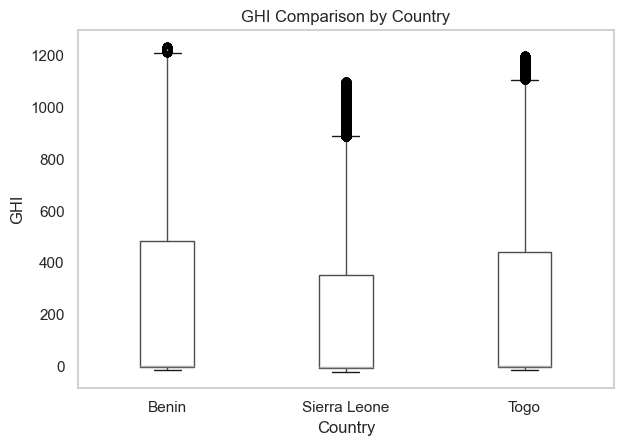

<Figure size 700x500 with 0 Axes>

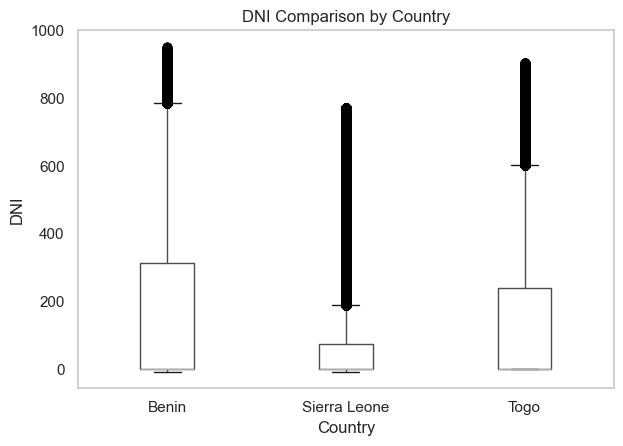

<Figure size 700x500 with 0 Axes>

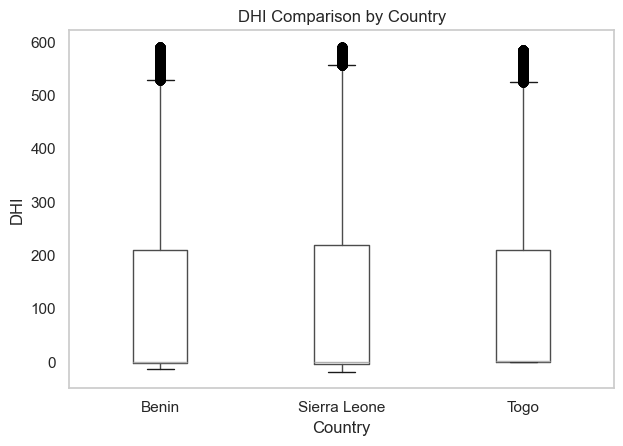

✅ Boxplots saved in ../data/
✅ Summary table saved as ../data/compare_summary.csv


In [20]:


# Save summary
summary.to_csv("../data/compare_summary.csv", index=False)

# ---------------------------------------------
# 3. Boxplots for GHI, DNI, DHI
# ---------------------------------------------
metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(7, 5))
    combined.boxplot(column=metric, by="Country", grid=False)
    plt.title(f"{metric} Comparison by Country")
    plt.suptitle("")  # remove default title
    plt.ylabel(metric)
    plt.tight_layout()
    plt.savefig(f"../data/boxplot_{metric}.png", dpi=150)  # optional: save PNG
    plt.show()

print("✅ Boxplots saved in ../data/")
print("✅ Summary table saved as ../data/compare_summary.csv")

In [21]:
# =============================================
# Optional Statistical Test: One-Way ANOVA or Kruskal–Wallis
# =============================================
from scipy import stats

# Extract GHI values by country
ghi_benin = combined[combined['Country'] == 'Benin']['GHI']
ghi_sierra = combined[combined['Country'] == 'Sierra Leone']['GHI']
ghi_togo = combined[combined['Country'] == 'Togo']['GHI']

# --------------------------------------------------
# 1. One-way ANOVA (parametric test)
# --------------------------------------------------
anova_stat, anova_p = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)

# --------------------------------------------------
# 2. Kruskal–Wallis test (non-parametric, robust)
# --------------------------------------------------
kw_stat, kw_p = stats.kruskal(ghi_benin, ghi_sierra, ghi_togo)

# --------------------------------------------------
# 3. Print results
# --------------------------------------------------
print("=== Statistical Testing on GHI ===")
print(f"One-way ANOVA: F = {anova_stat:.3f}, p = {anova_p:.5f}")
print(f"Kruskal–Wallis: H = {kw_stat:.3f}, p = {kw_p:.5f}")

# Interpret results
alpha = 0.05
if anova_p < alpha:
    print(f"✅ ANOVA: Significant differences exist (p < {alpha})")
else:
    print(f"❌ ANOVA: No significant differences (p ≥ {alpha})")

if kw_p < alpha:
    print(f"✅ Kruskal–Wallis: Significant differences exist (p < {alpha})")
else:
    print(f"❌ Kruskal–Wallis: No significant differences (p ≥ {alpha})")


=== Statistical Testing on GHI ===
One-way ANOVA: F = 2782.622, p = 0.00000
Kruskal–Wallis: H = 5142.448, p = 0.00000
✅ ANOVA: Significant differences exist (p < 0.05)
✅ Kruskal–Wallis: Significant differences exist (p < 0.05)


### 🔑 Key Observations

- **Benin exhibits the highest median GHI and DNI**, suggesting it receives the most direct and total solar irradiance among the three countries — making it potentially optimal for solar energy generation.

- **Sierra Leone shows the lowest median values across all irradiance components (GHI, DNI, DHI)**, indicating consistently lower solar resource availability compared to Benin and Togo.

- **Togo displays moderate irradiance levels with relatively low variability** (tighter boxplots), while Benin and Sierra Leone show greater spread — implying more fluctuation in solar conditions, which could impact system reliability or forecasting accuracy.

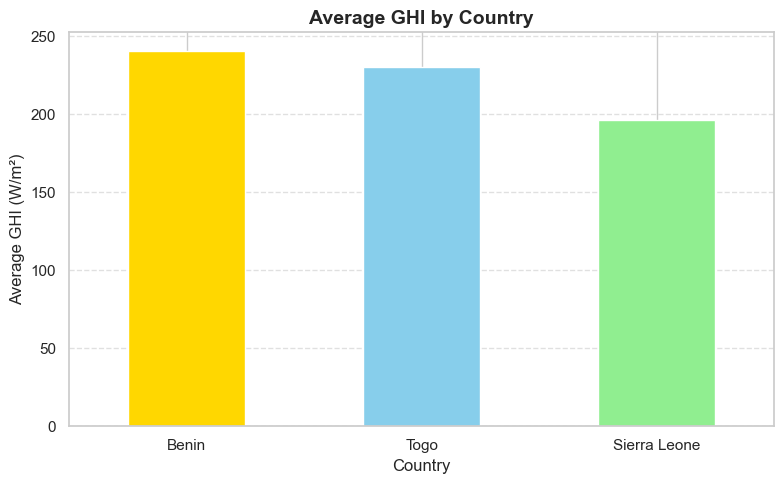

In [22]:
# =============================================
# Bonus: Bar chart ranking countries by average GHI
# =============================================
import matplotlib.pyplot as plt

# Calculate average GHI per country
avg_ghi = combined.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color=['gold', 'skyblue', 'lightgreen'])
plt.title('Average GHI by Country', fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
